Creating RawArray with float64 data, n_channels=8, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.


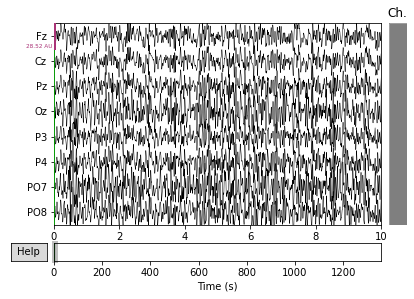

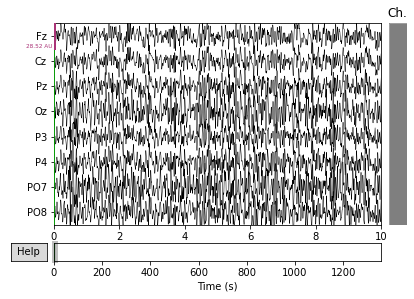

In [6]:
import numpy as np
import mne
import scipy.io as sio
import pandas as pd
# Read the CSV file as a NumPy array
A01 = sio.loadmat('A01.mat',squeeze_me=True)
df=pd.DataFrame(A01['data']['X'].tolist(),columns=A01['data']['channels'].tolist().tolist())
# Some information about the channels
ch_names = A01['data']['channels'].tolist().tolist() # TODO: finish this list

# Sampling rate of the Nautilus machine
sfreq = 256  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(df.values.T, info)

# Plot it!
raw.plot()

(<matplotlib.image.AxesImage at 0x1bbe4d22788>,
 <matplotlib.contour.QuadContourSet at 0x1bbe4d2a2c8>)

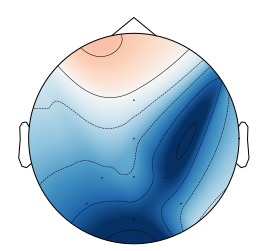

In [36]:
import mne
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
#设置通道名
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
#生成数据
data = df.values.T
#创建info对象
info = mne.create_info(ch_names= A01['data']['channels'].tolist().tolist(), sfreq=256.,
                            ch_types='eeg')
#创建evokeds对象                       
evoked = mne.EvokedArray(data, info)
#evokeds设置通道
evoked.set_montage(biosemi_montage)


mne.viz.plot_topomap(evoked.data[:, 2], evoked.info,show=False)
